In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline


In [2]:
df=pd.read_csv('customer_churn_data.csv')
df.shape

(7043, 21)

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.loc[df.Churn=='No','Churn']=0
df.loc[df.Churn=='Yes','Churn']=1

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
cols=['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols:
    df[i]=df[i].replace({'No internet service':'No'})

In [11]:
df['TotalCharges']=df["TotalCharges"].replace(" ",np.nan)

df=df[df["TotalCharges"].notnull()]
df=df.reset_index()[df.columns]

df["TotalCharges"]=df["TotalCharges"].astype(float)

df["Churn"].value_counts().values

array([5163, 1869], dtype=int64)

In [12]:
plot_by_churn_labels = df["Churn"].value_counts().keys().tolist()
plot_by_churn_values = df["Churn"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_churn_labels,
           values = plot_by_churn_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Customer Churn",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout) 
po.plot(fig)

'temp-plot.html'

In [13]:
plot_by_internet=df.groupby('InternetService').Churn.mean().reset_index()
plot_data=[go.Bar(x=plot_by_internet['InternetService'],y=plot_by_internet['Churn'],width=[0.3,0.3,0.3],marker=dict(color=['orange','green','teal']))]
plot_layout=go.Layout(xaxis={"type":"category"},yaxis={"title": "Churn Rate"},title='Chrun Rate By Internet Service',plot_bgcolor='rgb(243,243,243)',paper_bgcolor='rgb(243,243,243)',)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.plot(fig)

'temp-plot.html'

In [14]:
plot_by_payment = df.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment['PaymentMethod'],
        y=plot_by_payment['Churn'],
        width = [0.3, 0.3,0.3,0.3],
        marker=dict(
        color=['orange', 'green','teal','magenta'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Payment Method',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.plot(fig)

'temp-plot.html'

In [15]:
plot_by_contract = df.groupby('Contract').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_contract['Contract'],
        y=plot_by_contract['Churn'],
        width = [0.3, 0.3,0.3],
        marker=dict(
        color=['orange', 'green','teal'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Contract Duration',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.plot(fig)

'temp-plot.html'

In [16]:
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot_by_tenure['tenure'],
        y=plot_by_tenure['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'green'
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Relation between Tenure & Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.plot(fig)

'temp-plot.html'

In [17]:
df=pd.get_dummies(df,columns=['Contract','Dependents','DeviceProtection','gender','InternetService','MultipleLines','OnlineBackup','OnlineSecurity','PaperlessBilling','Partner','PaymentMethod','PhoneService','SeniorCitizen','StreamingMovies','StreamingTV','TechSupport'],drop_first=True)
df.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columns_for_ft_scaling] = standardScaler.fit_transform(df[columns_for_ft_scaling])
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [19]:
df.columns


Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [20]:
df.shape

(7032, 26)

In [21]:

from sklearn.model_selection import train_test_split
y= df['Churn'].astype('int')
X=df.drop(['Churn','customerID'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize the Logistic Regression model
logmodel = LogisticRegression(random_state=50)

# Fit the model on the training data
logmodel.fit(X_train, y_train)

# Predict on the test set
pred = logmodel.predict(X_test)

# Calculate accuracy
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

print(f"Logistic Regression Accuracy: {logmodel_accuracy}%")


Logistic Regression Accuracy: 81.14%


In [36]:
svcmodel = SVC(kernel='linear', random_state=1, probability=True)
svcmodel.fit(X_train,y_train)
svc_pred = svcmodel.predict(X_test)
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)
print(f"SVC Model Accuracy: {svc_accuracy}%")

SVC Model Accuracy: 80.66%


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnmodel.fit(X_train, y_train) 
knn_pred = knnmodel.predict(X_test)
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)
print(f"KNN Model Accuracy: {knn_accuracy}%")

KNN Model Accuracy: 76.82%


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
dt_pred = dtmodel.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
print(f"Decision Tree Model Accuracy: {dt_accuracy}%")

Decision Tree Model Accuracy: 73.27%


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
rf_pred = rfmodel.predict(X_test)
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
print(f"Random Forest Model Accuracy: {rf_accuracy}%")

Random Forest Model Accuracy: 79.38%


In [40]:
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,81.14,Logistic Regression
1,80.66,Support Vector Machine
2,79.38,Random Forest
3,76.82,K-Nearest Neighbor
4,73.27,Decision Tree


In [41]:
from sklearn.metrics import confusion_matrix
con_logmodel=confusion_matrix(y_test,pred)
print(con_logmodel)

[[1396  165]
 [ 233  316]]


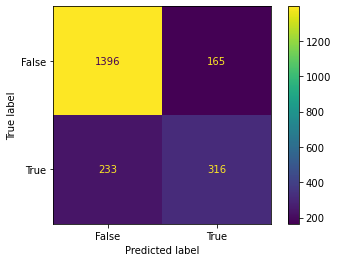

In [42]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con_logmodel,display_labels=[False,True])
cm_display.plot()
plt.show()

In [43]:
df['Probability_of_Churn']=logmodel.predict_proba(df[X_test.columns])[:,1]
df[['customerID','Probability_of_Churn']].head(n=80)

,customerID,Probability_of_Churn
0,7590-VHVEG,0.649225
1,5575-GNVDE,0.043673
2,3668-QPYBK,0.340977
3,7795-CFOCW,0.026396
4,9237-HQITU,0.694569
...,...,...
75,2673-CXQEU,0.194473
76,6416-JNVRK,0.044254
77,5590-ZSKRV,0.182205
78,0191-ZHSKZ,0.301266
